In [ ]:
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
splits = {'train': 'data/train-00000-of-00001.parquet', 'validation': 'data/validation-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/mteb/nsynth-mini/" + splits["train"])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
df.head()

,audio,note,sample_rate,pitch,instrument_source,instrument_family_str,instrument_str,note_str,qualities_str,instrument_source_str,velocity,instrument_family,instrument,qualities
0,{'bytes': b'RIFF$\xf4\x01\x00WAVEfmt \x10\x00\...,180871,16000,81,0,mallet,mallet_acoustic_065,mallet_acoustic_065-081-127,"[fast_decay, percussive]",acoustic,127,5,676,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]"
1,{'bytes': b'RIFF$\xf4\x01\x00WAVEfmt \x10\x00\...,176097,16000,106,1,mallet,mallet_electronic_004,mallet_electronic_004-106-075,"[bright, distortion, nonlinear_env]",electronic,75,5,192,"[1, 0, 1, 0, 0, 0, 1, 0, 0, 0]"
2,{'bytes': b'RIFF$\xf4\x01\x00WAVEfmt \x10\x00\...,82568,16000,58,2,flute,flute_synthetic_006,flute_synthetic_006-058-127,[distortion],synthetic,127,2,608,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
3,{'bytes': b'RIFF$\xf4\x01\x00WAVEfmt \x10\x00\...,231048,16000,77,2,bass,bass_synthetic_131,bass_synthetic_131-077-127,[distortion],synthetic,127,0,909,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
4,{'bytes': b'RIFF$\xf4\x01\x00WAVEfmt \x10\x00\...,75231,16000,68,0,string,string_acoustic_017,string_acoustic_017-068-025,[reverb],acoustic,25,8,120,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   audio                  3001 non-null   object
 1   note                   3001 non-null   int64 
 2   sample_rate            3001 non-null   int64 
 3   pitch                  3001 non-null   int64 
 4   instrument_source      3001 non-null   int64 
 5   instrument_family_str  3001 non-null   object
 6   instrument_str         3001 non-null   object
 7   note_str               3001 non-null   object
 8   qualities_str          3001 non-null   object
 9   instrument_source_str  3001 non-null   object
 10  velocity               3001 non-null   int64 
 11  instrument_family      3001 non-null   int64 
 12  instrument             3001 non-null   int64 
 13  qualities              3001 non-null   object
dtypes: int64(7), object(7)
memory usage: 328.4+ KB


In [ ]:
df.shape

(3001, 14)

In [ ]:
for i in range(3):
    row = df.iloc[i]
    print(f"----- SAMPLE {i} -----")
    # print("Audio/ Sound:", row["audio"])
    print("Filename / Note:", row["note"])
    print("Sample Rate:", row["sample_rate"])
    print("Instrument Family:", row["instrument_family_str"])
    print("Instrument:", row["instrument_str"])
    print("Pitch:", row["pitch"])
    print("Velocity:", row["velocity"])
    print("Qualities:", row["qualities_str"])
    print()


----- SAMPLE 0 -----
Filename / Note: 180871
Sample Rate: 16000
Instrument Family: mallet
Instrument: mallet_acoustic_065
Pitch: 81
Velocity: 127
Qualities: ['fast_decay' 'percussive']

----- SAMPLE 1 -----
Filename / Note: 176097
Sample Rate: 16000
Instrument Family: mallet
Instrument: mallet_electronic_004
Pitch: 106
Velocity: 75
Qualities: ['bright' 'distortion' 'nonlinear_env']

----- SAMPLE 2 -----
Filename / Note: 82568
Sample Rate: 16000
Instrument Family: flute
Instrument: flute_synthetic_006
Pitch: 58
Velocity: 127
Qualities: ['distortion']



In [ ]:
import soundfile as sf
import io
from IPython.display import Audio
import numpy as np

for i in range(5):
    row = df.iloc[i]
    audio_bytes = row["audio"]["bytes"]


    audio_np, sr = sf.read(io.BytesIO(audio_bytes))

    print(f"Playing sample {i} - Instrument:", row["instrument_family_str"], "| Pitch:", row["pitch"])
    display(Audio(audio_np, rate=sr))
    print()


Playing sample 0 - Instrument: mallet | Pitch: 81



Playing sample 1 - Instrument: mallet | Pitch: 106



Playing sample 2 - Instrument: flute | Pitch: 58



Playing sample 3 - Instrument: bass | Pitch: 77



Playing sample 4 - Instrument: string | Pitch: 68


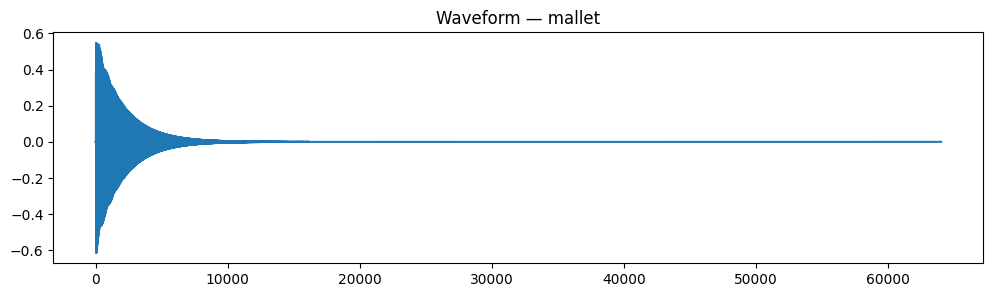

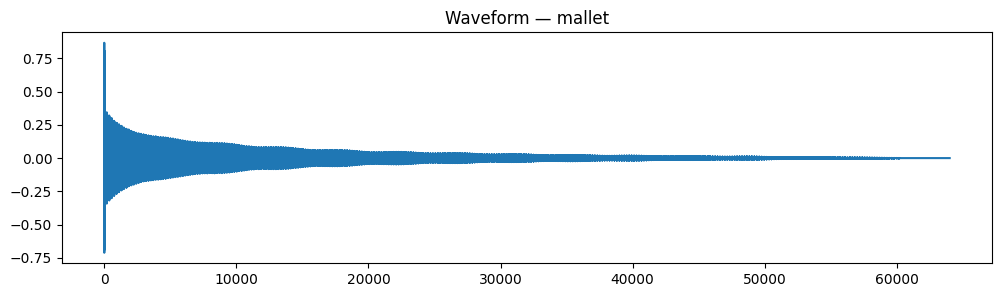

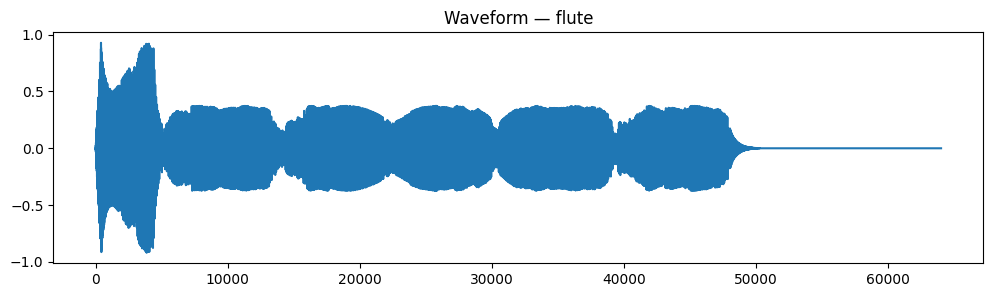

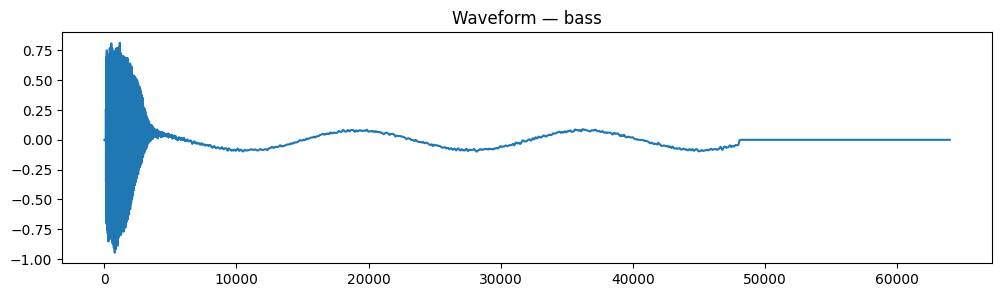

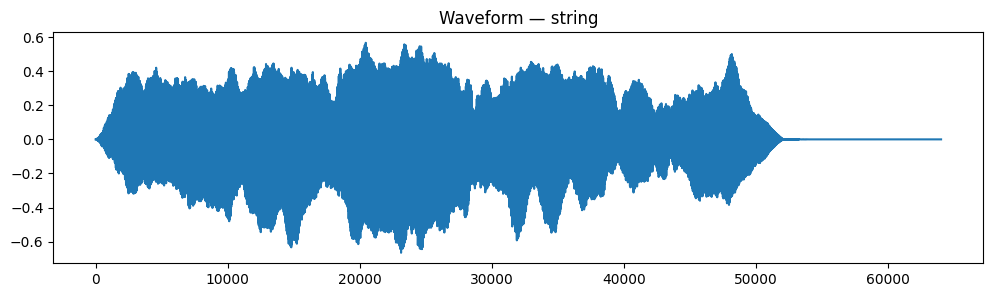

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    row = df.iloc[i]
    audio_np, sr = sf.read(io.BytesIO(row["audio"]["bytes"]))
    plt.figure(figsize=(12, 3))
    plt.plot(audio_np)
    plt.title(f"Waveform — {row['instrument_family_str']}")
    plt.show()


In [ ]:
for i in range(10):
    row = df.iloc[i]
    print(f"{i}: {row['instrument_family']} → {row['instrument_family_str']}")


0: 5 → mallet
1: 5 → mallet
2: 2 → flute
3: 0 → bass
4: 8 → string
5: 4 → keyboard
6: 0 → bass
7: 4 → keyboard
8: 0 → bass
9: 6 → organ


In [ ]:
for i in range(3):
    row = df.iloc[i]
    print(f"Sample {i}:")
    print("Instrument Family ID:", row["instrument_family"])
    print("Instrument Family Name:", row["instrument_family_str"])
    print("Full Instrument:", row["instrument_str"])
    print()


Sample 0:
Instrument Family ID: 5
Instrument Family Name: mallet
Full Instrument: mallet_acoustic_065

Sample 1:
Instrument Family ID: 5
Instrument Family Name: mallet
Full Instrument: mallet_electronic_004

Sample 2:
Instrument Family ID: 2
Instrument Family Name: flute
Full Instrument: flute_synthetic_006



In [ ]:
mapping = (
    df[["instrument_family", "instrument_family_str"]]
    .drop_duplicates()
    .sort_values("instrument_family")
    .reset_index(drop=True)
)

mapping


,instrument_family,instrument_family_str
0,0,bass
1,1,brass
2,2,flute
3,3,guitar
4,4,keyboard
5,5,mallet
6,6,organ
7,7,reed
8,8,string
9,9,synth_lead
